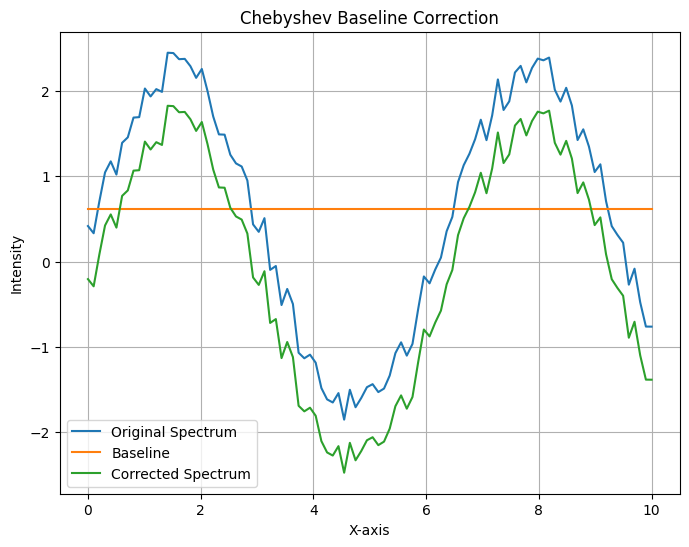

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def chebyshev_polynomial(x, *coeffs):
    """
    Chebyshev polynomial function for baseline correction
    
    Args:
        x (array-like): Input x-values
        *coeffs: Coefficients of Chebyshev polynomial

    Returns:
        array-like: Predicted baseline values
    """
    n = len(coeffs)
    chebyshev_terms = [coeffs[i] * np.polynomial.chebyshev.chebval(x, (i+1)) for i in range(n)]
    baseline = np.sum(chebyshev_terms, axis=0)
    return baseline

# Sample spectra data (x & y values)
x = np.linspace(0, 10, 100)
y = 2 * np.sin(x) + 0.5 * np.random.rand(len(x))

# Initial guess for Chebyshev polynomial coefficients
initial_guess = [0.1, 0.2, 0.05]

# Fit Chebyshev polynomial to the data
popt, _ = curve_fit(chebyshev_polynomial, x, y, p0=initial_guess)

# Generate baseline using the fitted coefficients
baseline = chebyshev_polynomial(x, *popt)

# Correct the original spectrum by subtracting baseline
corrected_spectrum = y - baseline

# Plot original spectrum, baseline & corrected spectrum
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original Spectrum')
plt.plot(x, baseline, label='Baseline')
plt.plot(x, corrected_spectrum, label='Corrected Spectrum')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Intensity')
plt.title('Chebyshev Baseline Correction')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


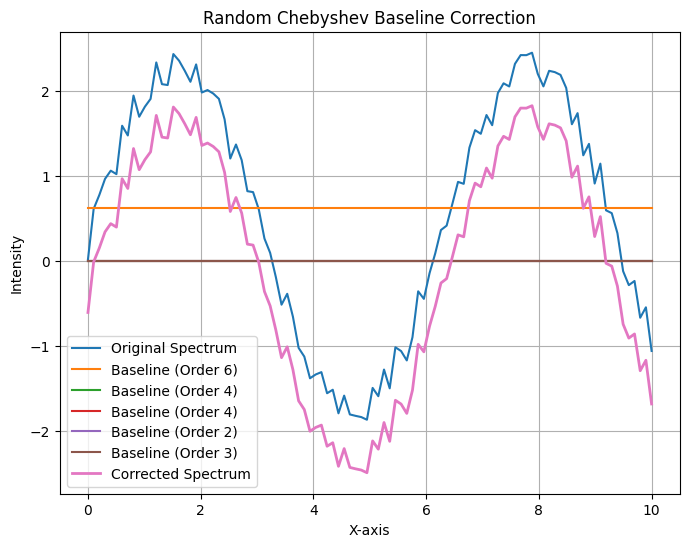

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import random
import matplotlib.pyplot as plt

def chebyshev_polynomial(x, *coeffs):
    """
    Chebyshev polynomial function for baseline correction
    
    Args:
        x (array-like): Input x-values
        *coeffs: Coefficients of the Chebyshev polynomial

    Returns:
        array-like: Predicted baseline values.
    """
    n = len(coeffs)
    chebyshev_terms = [coeffs[i] * np.polynomial.chebyshev.chebval(x, (i+1)) for i in range(n)]
    baseline = np.sum(chebyshev_terms, axis=0)
    return baseline

# Sample spectra data (x & y values)
x = np.linspace(0, 10, 100)
y = 2 * np.sin(x) + 0.5 * np.random.rand(len(x))

# Specify range for randomly selecting order of Chebyshev polynomial 
min_order = 2
max_order = 6

# Number of iterations (baseline segments)
num_iterations = 5

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original Spectrum')

for _ in range(num_iterations):
    # Randomly select polynomial order for this iteration
    order = random.randint(min_order, max_order)

    # Initial guess for Chebyshev polynomial coefficients (randomly initialized)
    initial_guess = [random.uniform(-1, 1) for _ in range(order)]

    # Fit Chebyshev polynomial to data (for this iteration)
    popt, _ = curve_fit(chebyshev_polynomial, x, y, p0=initial_guess)

    # Generate baseline using the fitted coefficients
    baseline = chebyshev_polynomial(x, *popt)

    # Correct original spectrum by subtracting baseline for this iteration
    y -= baseline

    # Plot the baseline (for this iteration)
    plt.plot(x, baseline, label=f'Baseline (Order {order})')

# Plot corrected spectrum
plt.plot(x, y, label='Corrected Spectrum', linewidth=2)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Intensity')
plt.title('Random Chebyshev Baseline Correction')
plt.grid(True)
plt.show()